## Importation des modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

## Fichier encodé

In [4]:
movie_encoding = pd.read_table('movie_encoding.csv', sep=';')
movie_encoding

,Unnamed: 0,votes,metascore,Action,Drama,Sci-Fi,Advendture,Fantasy,Comedy,History,...,Crime,Animation,Family,Musical,Romance,Sport,Biography,Music,Western,imdb_encoding
0,0,603294,77,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,536979,74,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,527314,85,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,527257,67,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,519811,76,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,3916,52776,59,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3917,3917,52007,80,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3918,3918,51622,51,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3919,3919,51034,64,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
movie_encoding = movie_encoding.drop(['Unnamed: 0'], axis = 1)

In [6]:
movie_encoding.columns

Index(['votes', 'metascore', 'Action', 'Drama', 'Sci-Fi', 'Advendture',
       'Fantasy', 'Comedy', 'History', 'Horror', 'Mystery', 'Thriller',
       'Crime', 'Animation', 'Family', 'Musical', 'Romance', 'Sport',
       'Biography', 'Music', 'Western', 'imdb_encoding'],
      dtype='object')

## 4ème étape: Mise en place d’un modèle de ML

In [7]:
X = movie_encoding.loc[:, movie_encoding.columns != 'imdb_encoding' ]
y = movie_encoding.loc[:, movie_encoding.columns == 'imdb_encoding' ]

In [13]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state=42)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(2744, 21) (1177, 21) (2744, 1) (1177, 1)


In [14]:
y_train["imdb_encoding"].value_counts()

0    1532
1    1212
Name: imdb_encoding, dtype: int64

In [15]:
X_test.head(2)

,votes,metascore,Action,Drama,Sci-Fi,Advendture,Fantasy,Comedy,History,Horror,...,Thriller,Crime,Animation,Family,Musical,Romance,Sport,Biography,Music,Western
803,251172,44,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1204,186800,52,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_train.head()

,imdb_encoding
1672,0
2821,1
472,0
2899,0
1512,1


## Regression logistique pour entrainer le modèle

In [17]:
logisticRegr = LogisticRegression()

In [18]:
model = logisticRegr.fit(X_train, y_train)

In [20]:
y_pred_test = logisticRegr.predict(X_test)

In [21]:
pd.DataFrame(y_pred_test, columns = ["pred"]).pred.value_counts().apply(lambda x: x/len(y_pred_test))

0    0.538658
1    0.461342
Name: pred, dtype: float64

### Matrice de confusion

In [22]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[568,  70],
       [ 66, 473]], dtype=int64)

In [26]:
tn, fp, fn, tp = cm_test.ravel()
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)
print("True Positive", tp)

True Negative 568
False Positive 70
False Negative 66
True Positive 473


#### Recall/ Accuracy/ Precision/ F1 Score

In [27]:
print("recall", round(recall_score(y_test, y_pred_test),4))
print("recall", tp/(tp+fn))

recall 0.8776
recall 0.8775510204081632


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy", round(accuracy_score(y_test, y_pred_test),4))
print("accuracy", (tp + tn)/ len(y_test))

accuracy 0.8845
accuracy 0.8844519966015293


In [29]:
print("precision", round(precision_score(y_test, y_pred_test),4))
print("precision", tp/(tp+fp))

precision 0.8711
precision 0.8710865561694291


## Courbe ROC, pour voir le comportement du modèle

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

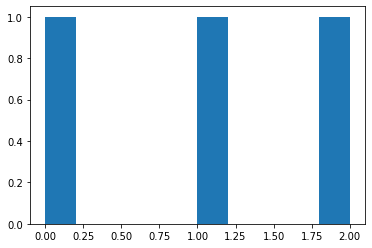

In [32]:
from sklearn import metrics 
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)
plt.hist(thresholds)

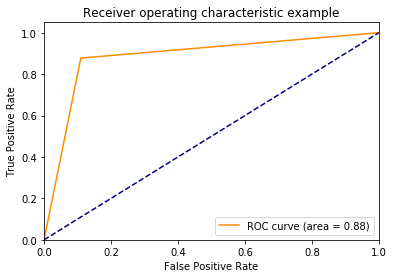

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### cross validation

In [34]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=3, random_state=7)

result = cross_val_score(logisticRegr, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8204539658250446


## Courbe ROC sur un modele déjà entrainé 

In [35]:
logisticRegr.predict_proba(X_train)

array([[0.54940609, 0.45059391],
       [0.44400241, 0.55599759],
       [0.662334  , 0.337666  ],
       ...,
       [0.85887212, 0.14112788],
       [0.45536511, 0.54463489],
       [0.63690886, 0.36309114]])

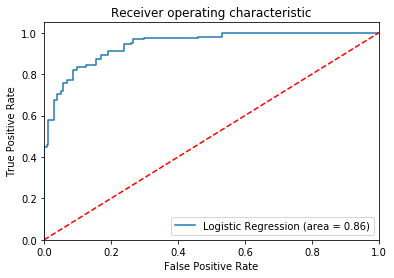

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(y_train, logisticRegr.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logisticRegr.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Prediction sur le X_train

In [37]:
y_pred_train = model.predict(X_train)

In [38]:
pd.DataFrame(y_pred_train, columns = ["pred"]).pred.value_counts().apply(lambda x: x/len(y_pred_train))

0    0.55758
1    0.44242
Name: pred, dtype: float64

In [39]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_train, y_pred_train)
cm_test

array([[1342,  190],
       [ 188, 1024]], dtype=int64)

In [40]:
print("accuracy", round(accuracy_score(y_train, y_pred_train),4))
print("precision", round(precision_score(y_train, y_pred_train),4))
print("recall", round(recall_score(y_train, y_pred_train),4))

accuracy 0.8622
precision 0.8435
recall 0.8449


In [41]:
y_pred_train_proba = model.predict_proba(X_train)
y_pred_train_proba[:,1]

array([0.45059391, 0.55599759, 0.337666  , ..., 0.14112788, 0.54463489,
       0.36309114])

## Courbe ROC

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)

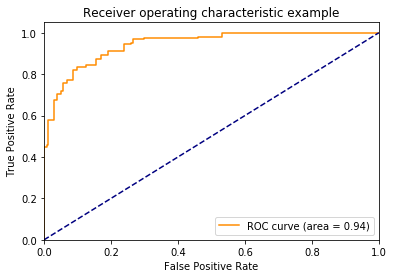

In [43]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()